<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/homework_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sb

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



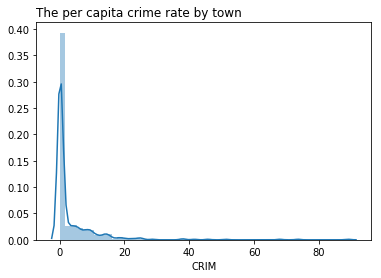

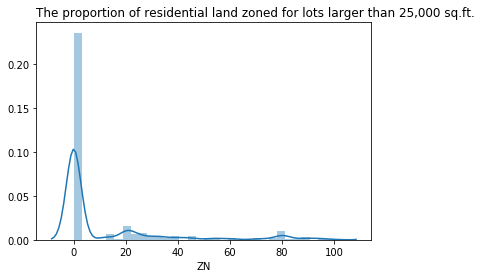

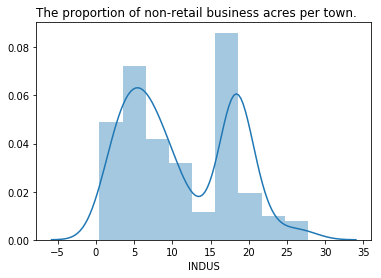

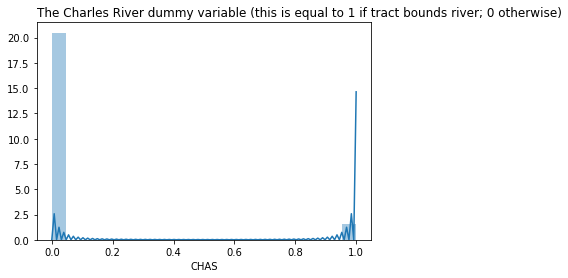

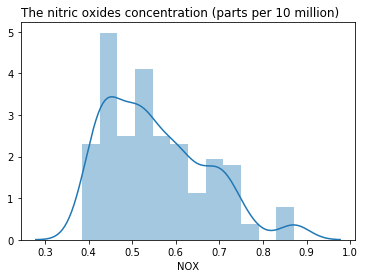

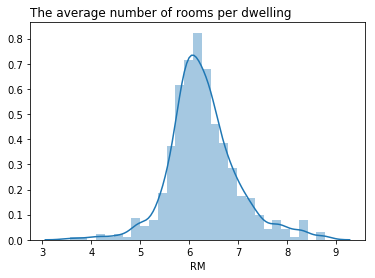

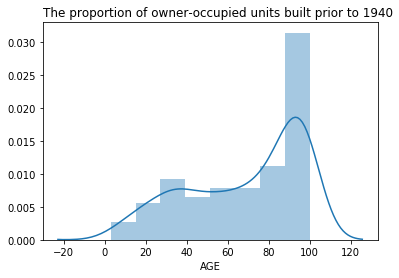

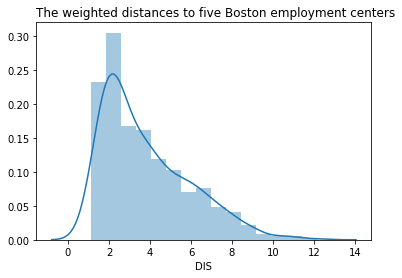

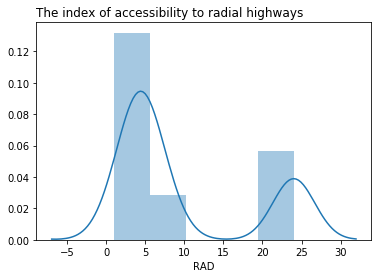

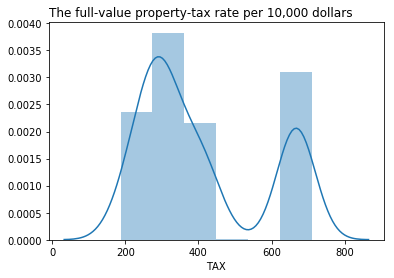

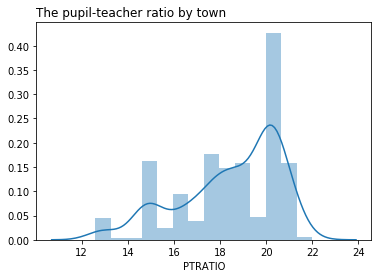

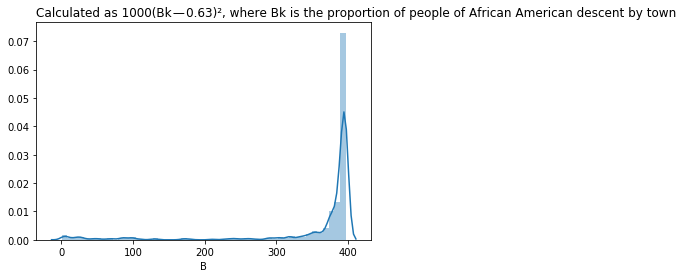

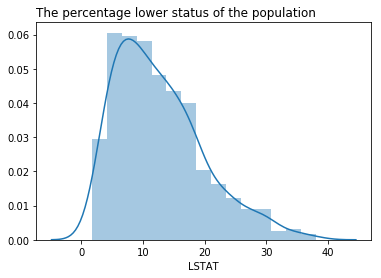

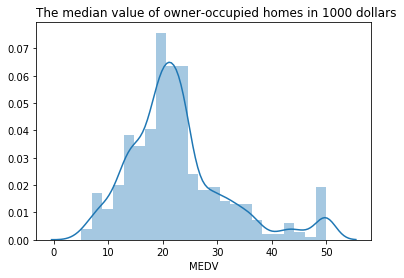

In [17]:
headers = {
	'B':       'Calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town',
	'ZN':     'The proportion of residential land zoned for lots larger than 25,000 sq.ft.',
	'RM':      'The average number of rooms per dwelling',
	'AGE':     'The proportion of owner-occupied units built prior to 1940',
	'DIS':     'The weighted distances to five Boston employment centers',
	'NOX':     'The nitric oxides concentration (parts per 10 million)',
	'RAD':     'The index of accessibility to radial highways',
	'TAX':     'The full-value property-tax rate per 10,000 dollars',
	'CRIM':    'The per capita crime rate by town',
	'CHAS':    'The Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)',
	'MEDV':    'The median value of owner-occupied homes in 1000 dollars',
	'INDUS':   'The proportion of non-retail business acres per town.',
	'LSTAT':   'The percentage lower status of the population',
	'PTRATIO': 'The pupil-teacher ratio by town'
}

for col in data.columns:
  dsp = data[col]
  
  sb.distplot(dsp)
  plt.title(headers[col],loc='left')
  
  plt.show()

В приведённых выше распределениях можно найти следующие распределения : 

**Нормальное** - **RM**: The average number of rooms per dwelling

**Равномерное** - С большой натяжкой **INDUS**: The proportion of non-retail business acres per town.

**Биноминальное** - **RAD**: This is the index of accessibility to radial highways

**Бернулли** - **CHAS**: The Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)

**Геометрическое** - *Таких дискретных распределений нет*

**Логнормальное** - **DIS**: This is the weighted distances to five Boston employment centers

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [89]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [84]:
# исключаем отсутствующие значения, поскольку в ковариации будут одни nan если этого не сделать
X = data.dropna().copy()
# и сбрасываем индекс, чтобы индексы у X и np.cov() совпадали, чтобы у нас была возможность восстановить впоследствии наименования стран
# если этого не сделать в итоговой таблице названия стран не совпадут и будет много Country=np.nan, что невозможно априори
X = X.reset_index(drop=True) 

# сохраняем наименования стран для последующего восстановления
cnt_s = X['Country (region)']
cnt_l = list(cnt_s)
print('Всего стран:',len(cnt_l))

# исключаем столбец страны поскольку в ковариации текстовые столбцы не участвуют
X.drop('Country (region)',axis='columns',inplace=True)
# строим матрицу ковариаций, и проеряем равна ли её размерность количеству стран
mtx = np.cov(X)
print('Размерность матрицы ковариаций: ',mtx.shape)

# готовим результат для вывода на экран
# для чего сохраняем матрицу в DataFrame, и добавляем подписи для читаемости
cX = pd.DataFrame(mtx)
cX.columns = list(map(lambda x: cnt_l[int(x)],cX.columns))
cX['Country'] = cnt_s

# PROFIT
cX

Countries: 140
Covariance matrix size:  (140, 140)


,Finland,Denmark,Norway,Iceland,Netherlands,Switzerland,Sweden,New Zealand,Canada,Austria,Australia,Costa Rica,Israel,Luxembourg,United Kingdom,Ireland,Germany,Belgium,United States,Czech Republic,Malta,Mexico,France,Chile,Guatemala,Spain,Panama,Brazil,Uruguay,Singapore,El Salvador,Italy,Slovakia,Trinidad and Tobago,Poland,Uzbekistan,Lithuania,Colombia,Slovenia,Nicaragua,...,Armenia,Iran,Guinea,Georgia,Gambia,Kenya,Mauritania,Mozambique,Tunisia,Bangladesh,Iraq,Congo (Kinshasa),Mali,Sierra Leone,Sri Lanka,Myanmar,Chad,Ukraine,Ethiopia,Uganda,Egypt,Zambia,Togo,India,Liberia,Comoros,Madagascar,Lesotho,Burundi,Zimbabwe,Haiti,Botswana,Malawi,Yemen,Rwanda,Tanzania,Afghanistan,Central African Republic,South Sudan,Country
0,289.788889,119.766667,44.333333,-49.655556,-5.644444,101.188889,77.166667,53.455556,-20.444444,133.555556,42.377778,10.411111,32.188889,161.222222,8.788889,-11.855556,70.111111,144.633333,-152.611111,306.255556,34.044444,31.122222,128.277778,-271.300000,-106.877778,64.988889,-108.200000,130.444444,6.933333,29.300000,60.388889,-104.755556,-62.255556,-214.233333,127.833333,56.777778,388.333333,-52.633333,183.644444,-138.611111,...,41.355556,-352.411111,-157.944444,359.322222,-279.766667,-374.600000,200.200000,143.388889,106.488889,330.833333,-142.177778,176.255556,-43.511111,-129.544444,-428.488889,-275.488889,-36.711111,-65.022222,108.233333,-226.744444,143.877778,-251.144444,65.511111,-84.377778,-144.411111,-415.333333,-147.433333,115.622222,67.600000,68.688889,-279.377778,142.677778,40.611111,303.088889,-12.544444,-213.711111,125.133333,-88.177778,-177.644444,Finland
1,119.766667,90.900000,60.888889,-42.233333,20.088889,57.811111,30.388889,34.544444,53.555556,53.111111,66.955556,75.477778,21.366667,59.000000,43.988889,40.633333,36.000000,89.033333,16.055556,8.855556,163.511111,-50.566667,71.833333,-104.700000,39.766667,76.233333,-54.355556,145.555556,74.622222,-34.966667,37.500000,-5.244444,-106.411111,-77.877778,-32.833333,63.111111,77.666667,-4.477778,105.466667,79.166667,...,31.422222,-20.477778,34.055556,11.566667,-28.677778,-217.511111,-28.200000,167.277778,13.288889,86.277778,64.733333,20.188889,-15.933333,33.766667,-203.288889,-45.400000,66.155556,-165.311111,-28.900000,-10.700000,38.900000,0.033333,66.044444,-24.622222,-8.477778,-157.444444,-163.900000,9.600000,60.400000,-88.688889,-66.844444,14.877778,27.722222,18.244444,16.988889,-127.844444,-29.022222,-12.044444,6.422222,Denmark
2,44.333333,60.888889,62.888889,-14.777778,28.333333,46.333333,2.888889,14.555556,75.333333,35.555556,70.444444,97.444444,78.222222,31.333333,46.888889,40.444444,23.333333,75.222222,65.777778,-5.666667,212.888889,-68.444444,70.888889,-7.111111,29.777778,154.000000,-24.777778,107.111111,63.333333,-40.222222,-2.222222,139.000000,-31.000000,-12.000000,-12.777778,-35.888889,16.000000,33.111111,138.222222,88.333333,...,72.555556,71.333333,23.777778,-113.888889,-58.000000,-173.111111,-130.111111,73.666667,37.777778,-3.333333,93.444444,-40.666667,-23.888889,45.666667,-69.111111,-19.222222,38.333333,-128.222222,-85.000000,19.777778,34.777778,21.777778,32.666667,24.444444,22.888889,-116.000000,-142.111111,-118.444444,-44.222222,-200.666667,-51.555556,-68.222222,-19.666667,-88.777778,-20.777778,-168.666667,-10.000000,8.555556,-0.777778,Norway
3,-49.655556,-42.233333,-14.777778,170.233333,-3.866667,-56.588889,-49.833333,-12.877778,-44.555556,-55.555556,-35.400000,65.744444,60.522222,-97.888889,-47.655556,-46.744444,-81.333333,-84.811111,2.611111,256.811111,-53.622222,122.011111,-136.500000,181.477778,126.344444,17.433333,228.244444,-11.222222,-52.733333,-112.811111,53.388889,189.911111,345.744444,415.766667,201.166667,42.777778,127.666667,224.588889,148.755556,-90.611111,...,-158.200000,-290.855556,-164.055556,-375.455556,-218.322222,138.844444,-140.800000,-272.611111,-165.400000,-266.722222,-271.844444,-9.522222,13.155556,-40.766667,158.400000,-137.822222,-206.711111,218.422222,-173.211111,-41.855556,-182.900000,-112.700000,-244.044444,-1

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [86]:
mis = data.isna().sum().sum()
print(f'В таблице data отсутствует {mis} значений')

mis = data['Country (region)'].isna().sum()
if mis > 0:
  print(f'Исключаем {mis}  строк из таблицы')
  data.dropna(subset=['Country (region)'],inplace=True)
else:
  print("В выборке 'Country' отсутствующих значений нет")


В таблице data отсутствует 23 значений
В выборке 'Country' отсутствующих значений нет


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [91]:
print(f"В выборке 'Country' {len(X)} стран")

print('Я не склонен верить, что это набор можно использовать как решение проблемы классификации, потому что для кжадой страны представлено только по одной записи и оттого попытки классифицировать страну X по её параметрам, будут явно сопровождаться ошибками')

В выборке 'Country' 156 стран
Я не склонен верить, что это набор можно использовать как решение проблемы классификации, потому что для кжадой страны представлено только по одной записи и оттого попытки классифицировать страну X по её параметрам, будут явно сопровождаться ошибками


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

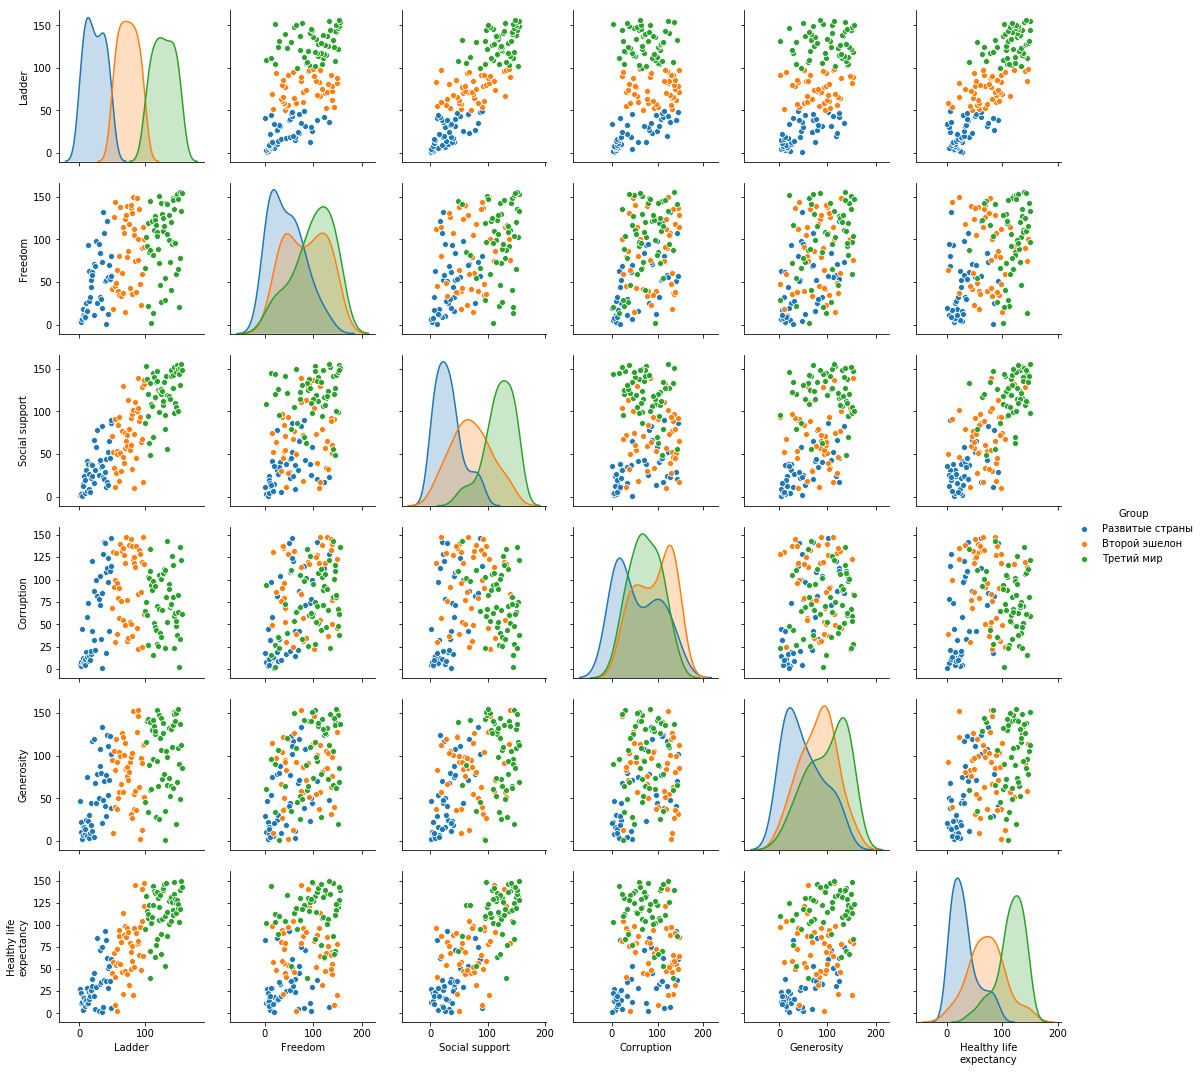

Мы сгруппировали все страны, по признаку общей удовлетворённости жизнью и выявили, что:
данный показатель коррелирует в наибольшей степени с 'Healthy life expectancy' и 'Social support'. 
На графиках первой строки отчёливо виден наклон выборки, что свидетельствует о наличии значимой взаимосвязи.
На графиках 'Social support'и 'Healthy life expectancy' также заметно, что развитые страны 
находятся в верхней части графика, что говорит о наличии зависимости.
Значения Freedom и Generosity, распределены по осям чуть более равномерно и это гвоорит о том, что их взаимосвязь с группой страны
скорее слабая, хотя можно и заметить значительную концентрацию развитых стран в зоне высокой оценки свободы.
Показатель corruption распредлен по графику весьма равномерно, хотя опять же стоит отметить концентрацию высоких оценок для развитых стран
внизу графика.



In [114]:
def fx_classify(value):
  "Эта функиця будет относить страну к одной из трёх групп"
  if value < 50:
    return 'Развитые страны'
  elif value<100:
    return 'Второй эшелон'
  else:
    return 'Третий мир'

data.dtypes
X = data[['Country (region)','Ladder','Freedom','Social support','Corruption','Generosity','Healthy life\nexpectancy']].dropna().copy()
X['Group'] = X['Ladder'].map(fx_classify)

sb.pairplot(X,hue='Group')
plt.show()

text = """Мы сгруппировали все страны, по признаку общей удовлетворённости жизнью и выявили, что:
данный показатель коррелирует в наибольшей степени с 'Healthy life expectancy' и 'Social support'. 
На графиках первой строки отчёливо виден наклон выборки, что свидетельствует о наличии значимой взаимосвязи.
На графиках 'Social support'и 'Healthy life expectancy' также заметно, что развитые страны 
находятся в верхней части графика, что говорит о наличии зависимости.
Значения Freedom и Generosity, распределены по осям чуть более равномерно и это гвоорит о том, что их взаимосвязь с группой страны
скорее слабая, хотя можно и заметить значительную концентрацию развитых стран в зоне высокой оценки свободы.
Показатель corruption распредлен по графику весьма равномерно, хотя опять же стоит отметить концентрацию высоких оценок для развитых стран
внизу графика.
"""
print(text)

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

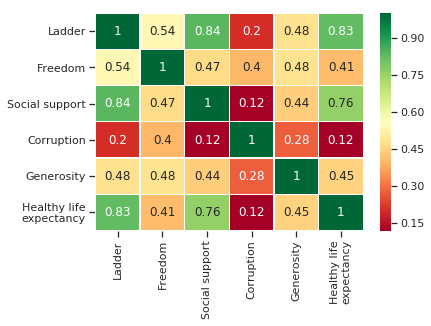

По графику можно сделать вывод, что наибольшая зависимость Ladder с
Healthy life expectancy и Social support




,Ladder,Freedom,Social support,Corruption,Generosity,Healthy life expectancy
Ladder,1.000000,0.542256,0.835883,0.203657,0.480067,0.827851
Freedom,0.542256,1.000000,0.466880,0.400848,0.483093,0.409324
Social support,0.835883,0.466880,1.000000,0.120515,0.441514,0.761904
Corruption,0.203657,0.400848,0.120515,1.000000,0.275839,0.123132
Generosity,0.480067,0.483093,0.441514,0.275839,1.000000,0.449101
Healthy life\nexpectancy,0.827851,0.409324,0.761904,0.123132,0.449101,1.000000


In [119]:
cX = X.corr()

sb.heatmap(cX,annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

print("""По графику можно сделать вывод, что наибольшая зависимость Ladder с
Healthy life expectancy и Social support

""")

cX

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

На графике представлена прямая, описывающая заивисмость Ladd 


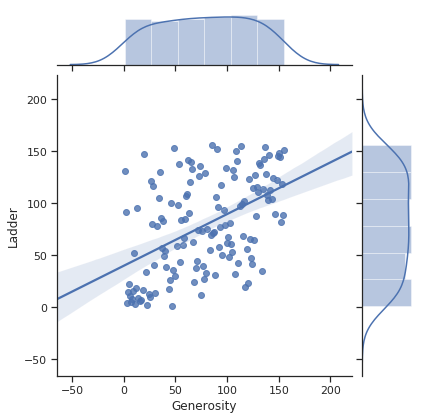

In [122]:
dsp = data.dropna()
Y = dsp['Ladder']
X = dsp['Generosity']

fig = sb.jointplot(x=X,y=Y,kind='reg')

print("""На графике представлена прямая, описывающая заивисмость Ladder от Generosity.
Сказать, что прямая явлется собственным вектором - не могу. 
""")

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

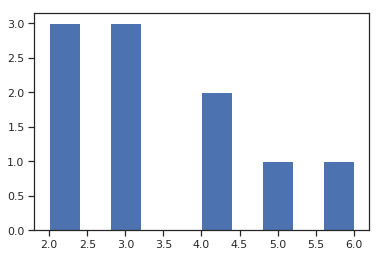

In [148]:
rnd = np.random.RandomState(123)

val = pd.Series(rnd.randint(1,7,size=10),dtype='int64')
#print(val)

plt.hist(val)
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

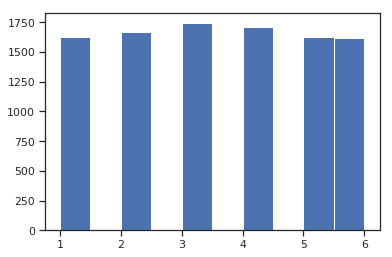

In [146]:
val = pd.Series(rnd.randint(1,7,size=10000),dtype='int64')
#print(val)

plt.hist(val)
plt.show()

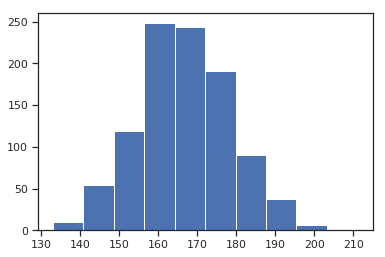

In [157]:
# для применения центральной пределльной теоремы,
# посмотрим как часто на кубике выпадает сторона 3 (это положительный исход)
# для этого проведём тысячу наблюдений по 1000 бросков
# количество выпадений цифры 3 на каждую тысячу бросков запишем в список vals
vals = []

for x in range(0,1000):
  val = pd.Series(rnd.randint(1,7,size=1000),dtype='int64')
  val = val.loc[val == 3]
  
  vals.append(len(val))

# построим гистограмму распределения положительных исходов
# из которой видно, что обычно на 1000 бросков
# приходится от 160 до 180 случаев выпадания стороны 3,
# хотя бываеют и случаи, когда их 130 или 120 но в общем результат
# подчиняется нормальному распределению, о чём и говорит ЦПТ
plt.hist(vals)
plt.show()